<a href="https://colab.research.google.com/github/GaneevRizvan/Fit.23.02/blob/main/Astro_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    RA_ICRS         DE_ICRS        Plx       Gmag     pmRA      pmDE  
      deg             deg          mas       mag    mas / yr  mas / yr
--------------- --------------- ---------- ------- --------- ---------
 57.00575009788  23.91876434802    -1.6185 20.8784    -1.178    -0.285
 56.98755780011  23.91823503073    -0.5628 19.8576     2.337    -1.668
 56.97645110906  23.92360661352     0.6690 19.4914    -0.061    -2.331
 56.96609333551  23.93317519579     0.7211 17.5249     0.569   -10.997
 56.96895124929  23.94103047316     7.4154  9.7527    19.842   -46.460
 56.92248630917  23.92326939520     0.7943 17.4894    -0.252    -4.221
 56.93299430195  23.92588199419     0.2353 18.9160    -0.429     0.554
 56.93138584679  23.91899632970     1.2524 18.7972    -2.328    -7.060
 56.92529103975  23.93348751733     1.5237 14.3825     3.323    -7.731
 56.91942393683  23.92860455551     1.5688 19.4124     1.933    -9.024
            ...             ...        ...     ...       ...       ...
 56.68

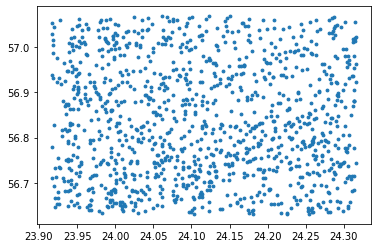

In [ ]:
import operator
from functools import reduce

import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

center_coord = SkyCoord('03h47m24s +24d07m00s')
columns = ['RA_ICRS', 'DE_ICRS', 'Plx', 'Gmag', 'pmRA', 'pmDE']
#column_filters = {column: '!=' for column in columns}.update({'Gmag':'>4'})
column_filters={'RA_ICRS':'!=', 'DE_ICRS':'!=', 'Plx':'!=', 'Gmag':'!=', 'pmRA':'!=','pmDE':'!='}#, 'Gmag':'<25'
vizier = Vizier(
    row_limit=10000,
    columns=columns,
    column_filters=column_filters,
)
stars = vizier.query_region(
    center_coord,
    width=0.4 * u.deg,
    height=0.4 * u.deg,
    catalog='I/345/gaia2',
)[0]
print (stars)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

pd_stars=stars.to_pandas()
plt.scatter(pd_stars['DE_ICRS'],pd_stars['RA_ICRS'], s=8) #данные

        pmRA    pmDE
0     -1.178  -0.285
1      2.337  -1.668
2     -0.061  -2.331
3      0.569 -10.997
4     19.842 -46.460
...      ...     ...
1144   4.308 -11.695
1145  -4.217 -25.695
1146  -1.333  -1.737
1147   2.851 -11.909
1148  -0.468  -3.202

[1149 rows x 2 columns]
[[  1.97643048  -3.40727524]
 [ 24.04667677 -37.14028283]]


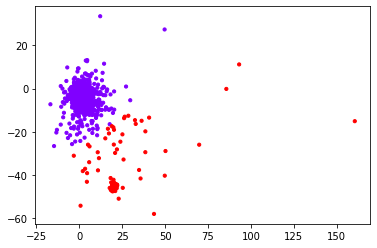

In [ ]:
stars_12=pd_stars[['pmRA','pmDE']] #кластеризация по скоростям
print (stars_12)


model = KMeans(n_clusters=2)
model.fit(stars_12)
print(model.cluster_centers_)


plt.scatter(pd_stars['pmRA'],pd_stars['pmDE'], c=model.labels_, cmap='rainbow', s=10)
#plt.scatter(model.cluster_centers_[:,0] ,model.cluster_centers_[:,1], color='black')


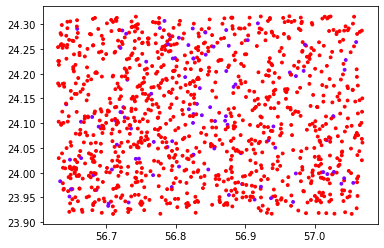

In [ ]:
plt.scatter(pd_stars['RA_ICRS'],pd_stars['DE_ICRS'], c=model.labels_, cmap='rainbow', s=8)

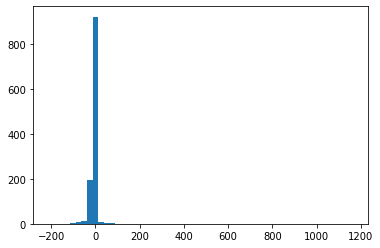

[[1.11111111e+03]
 [7.00543901e-01]]


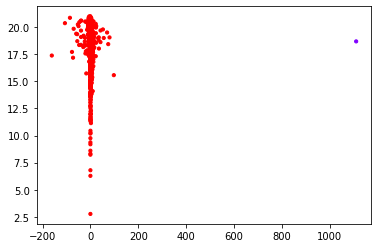

In [ ]:
import numpy as np
a=(pd_stars['Plx']).values
plx_1=1/a
#print(np.sort(plx_1))
#p = pd_stars['Plx'].hist()
bin_edges = np.arange(-200,1200,25)
hist=np.histogram(plx_1, bin_edges)[0]
plt.bar(bin_edges[:-1], hist, width = 25)
plt.show()

#print(plx_1, len(plx_1))
#print(pd_stars)
pd_stars = pd_stars.assign(Plx_1 = 1 / pd_stars.Plx)
#print(pd_stars)

model_p = KMeans(n_clusters=2)
model_p.fit(pd_stars[['Plx_1']])
print(model_p.cluster_centers_)


plt.scatter(pd_stars['Plx_1'], pd_stars['Gmag'], c=model_p.labels_, cmap='rainbow', s=10)
#fig1 = p.get_figure()

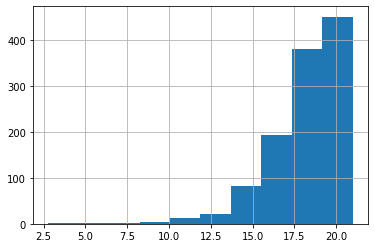

In [ ]:
g = pd_stars['Gmag'].hist()
fig2 = g.get_figure()

1.935
19.512
21.447
                 oid filter          mjd     mag  magerr  clrcoeff  \
0    795205100007271     zr  58198.47636  21.216   0.214     0.102   
1    795205100007271     zr  58198.48414  21.366   0.227     0.104   
2    795205100007271     zr  58198.48505  21.235   0.216     0.101   
3    795205100007271     zr  58217.39009  21.046   0.201     0.099   
4    795205100007271     zr  58217.44148  20.750   0.177     0.107   
..               ...    ...          ...     ...     ...       ...   
265  795205100007271     zr  58704.18463  21.154   0.209     0.099   
266  795205100007271     zr  58715.26356  20.710   0.173     0.101   
267  795205100007271     zr  58725.26221  20.906   0.189     0.102   
268  795205100007271     zr  58732.26240  21.093   0.204     0.100   
269  795205100007271     zr  58733.26197  20.940   0.192     0.101   

                        time  mjd_int  
0    2018-03-21T11:25:57.504    58198  
1    2018-03-21T11:37:09.696    58198  
2    2018-03-21T11:

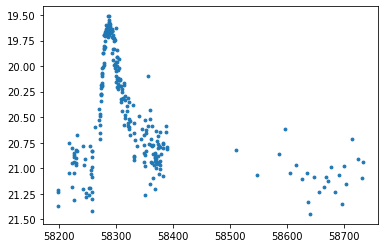

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import time
import math

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/python/795205100007271.csv") 
A=max(data['mag'])-min(data['mag'])
print(format(A, '.3f'))
print(min(data['mag']))
print(max(data['mag']))

times=list()
for i in data['mjd']:
    times.append(str(i))
t = time.Time (times, format ='mjd', scale ='utc')
data['time']= t.isot
mjd_int=list()
for i in data['mjd']:
    mjd_int.append(math.trunc(i))
data['mjd_int']= mjd_int
print(data)
mag_min = data['mag'].idxmin()
print(data['mjd'][mag_min])
#plt.gca().invert_yaxis()
plt.scatter(data['mjd'],data['mag'], cmap='rainbow', s=8)
#plt.errorbar(data['mjd'],data['mag'],data['magerr'], ls='')

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression

#poly = PolynomialFeatures(degree = 2, include_bias = False)
#X_poly = poly.fit_transform(data['mjd'].to_numpy().reshape(-1, 1))
#Poly_model = LinearRegression(fit_intercept=False).fit(X_poly, data['mag'].to_numpy().reshape(-1, 1))
#print(Poly_model.coef_)
#poly_reg = data['mjd']*Poly_model.coef_[0][0]+data['mjd']*data['mjd']*Poly_model.coef_[0][1]
#plt.plot(data['mjd'], poly_reg, color='orange')

#model = np.poly1d(np.polyfit(data['mjd'], data['mag'], 7))
#polyline = np.linspace(58200, 58700, 50)
#plt.plot(polyline, model(polyline))

plt.gca().invert_yaxis()
plt.show()

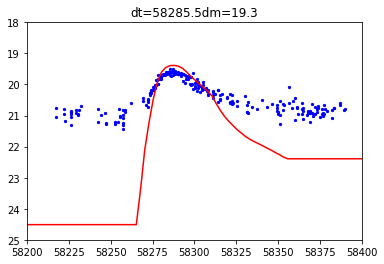

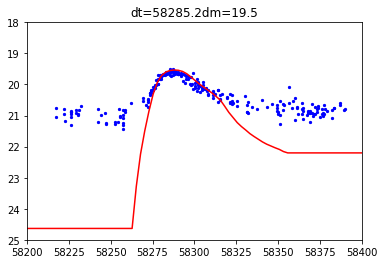

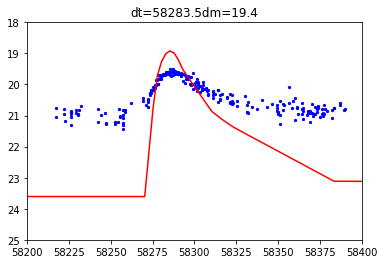

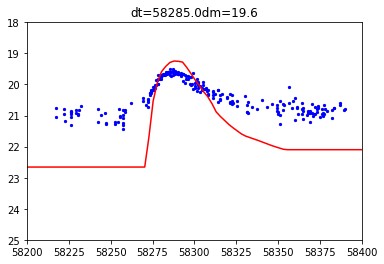

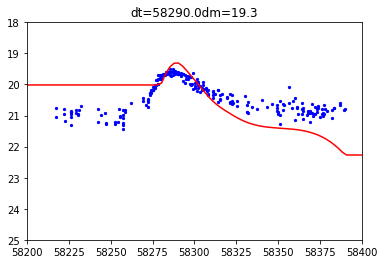

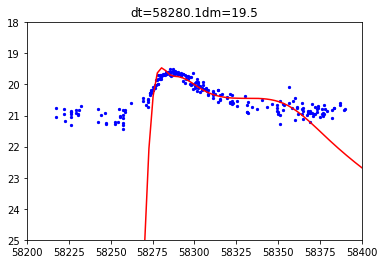

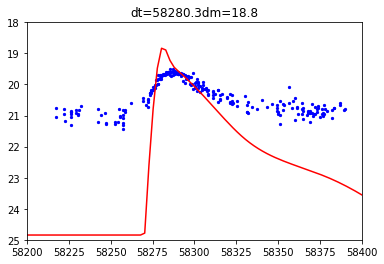

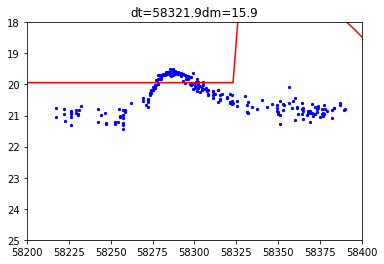

In [8]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
#?curve_fit
def task(s, p):
    f = open(s,'r')
    df1 = pd.read_csv(f,header=None,sep='\s+')
    df1.drop(labels = [0],axis = 0, inplace=True) 

    mjd_mag = zip(data['mjd'] , data['mag'])
    mjd_mag = list(mjd_mag)
    mjd_mag_cut = []
    for i in mjd_mag:
      if(i[0]<58325 and i[0]>58275):   #область по оси Х, где хотим приблизить
        mjd_mag_cut.append(i)

    spline = UnivariateSpline(x=df1[0], y=df1[p], s=0, k=3, ext=3)
    def model(x,dt,dm):
      return spline(x-dt) + dm
    #(dt,dm),_ = curve_fit(model, xdata=data['mjd'], ydata=data['mag'], p0=[58300, 19])

    mjd, mag = zip(*mjd_mag_cut)

    (dt,dm),_ = curve_fit(model, xdata = mjd, ydata = mag, p0=[58300, 19])
    plt.scatter(data['mjd'],data['mag'], cmap='rainbow', s=5, color='blue')
    x = np.linspace(58200, 58700, 200)
    y = model(x, dt, dm)
    plt.plot(x, y, color='red')
    x_spline = np.linspace(58200, 58700, 500)
    plt.title(f'{dt=:.1f}{dm=:.1f}' )
    plt.xlim(58200,58400)
    plt.ylim(18,25)
    plt.gca().invert_yaxis()
    plt.show()
    #for i in np.arange(18,21.1,0.1):
        #i=round(i,1)
        #for j in np.arange(58250,58350,3):
            #x2 = df1[0].to_numpy() + j
            #y2 = df1[p].to_numpy() + i
            #spline_1 = UnivariateSpline(x=x2, y=y2, s=0, k=3, ext=3)
            #plt.plot(x_spline, spline_1(x_spline))
            #plt.scatter(x2, y2, cmap='rainbow', s=5, color='red') #шаблон
            #plt.xlim(58250,58400)
            #plt.ylim(18,25)
            #plt.gca().invert_yaxis()
            #plt.show()
            #hyp=0
            #for t in ser:
                    #hyp=hyp+(t[1]-spline_1(t[0]))**2
            #res.append([i,j,hyp,spline_1])
    #res.sort(key=lambda x: x[2])
    #print(res[0][0], res[0][1], res[0][2], sep='  ')
    #x3 = df1[0].to_numpy() + res[0][1]
    #y3 = df1[p].to_numpy() + res[0][0]
    #plt.scatter(data['mjd'],data['mag'], cmap='rainbow', s=5, color='blue')
    #plt.scatter(x3, y3, cmap='rainbow', s=5, color='red')
    #x_spline = np.linspace(58200, 58700, 500)
    #plt.plot(x_spline, res[0][3](x_spline))
    #plt.xlim(58200,58400)
    #plt.ylim(18,25)
    #plt.gca().invert_yaxis()
    #plt.show()

task('/content/drive/MyDrive/Colab Notebooks/python/sn1a_lc.v1.2.dat', 3)
task('/content/drive/MyDrive/Colab Notebooks/python/sn91t_lc.v1.1.dat', 3)
task('/content/drive/MyDrive/Colab Notebooks/python/sn91bg_lc.v1.1.dat', 3)
task('/content/drive/MyDrive/Colab Notebooks/python/sn1bc_lc.v1.1.dat', 3)
task('/content/drive/MyDrive/Colab Notebooks/python/hyper_lc.v1.2.dat', 1)
task('/content/drive/MyDrive/Colab Notebooks/python/sn2p_lc.v1.2.dat', 1)
task('/content/drive/MyDrive/Colab Notebooks/python/sn2l_lc.v1.2.dat', 1)
task('/content/drive/MyDrive/Colab Notebooks/python/sn2n_lc.v2.1.dat', 1)